# outliers like heights of men and it include too much height which is not humnas height
or
something like 1,2,3,4,5,6,and then 008,09 u can see
or temperature is 30 to 35 in summer but in some mobile shwing 65 degree then its outlier but its not that hot its showing wrong
achanak se change is outlier # check blog on outliers https://codanics.com/books/abc-of-statistics-for-data-science/Chapter6.html
name of outliers
-deviant or daviance
-abnormalities
-anomalous points
- abbrerant observations
# types of outliers
1. Univariant - jo ek hi variable ke ander ho
2. Multivariant -in different variables like age,name,price but 1 row in it is wrong
3. Global outlier - which is outlier in whole dataset
4. Point outlier - 
5. Local outlier -
6. Contextual outlier - like guest they cant stay it belongs to us but not us
7. and more
   

In [1]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the mean and standard deviation
mean = np.mean(data['Age'])
std = np.std(data['Age'])

# Step 4: Calculate the Z-Score
data['Z-Score'] = (data['Age'] - mean) / std

# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['Z-Score'] > 3]}")
print("----------------------------------------")
# Step 7: Remove the outliers
data = data[data['Z-Score'] <= 3]

# Step 8: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
----------------------------------------
Here are the outliers based on the z-score threshold, 3:
     Age   Z-Score
11   50  3.037793
----------------------------------------
Here is the data without outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


In [2]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


In [3]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


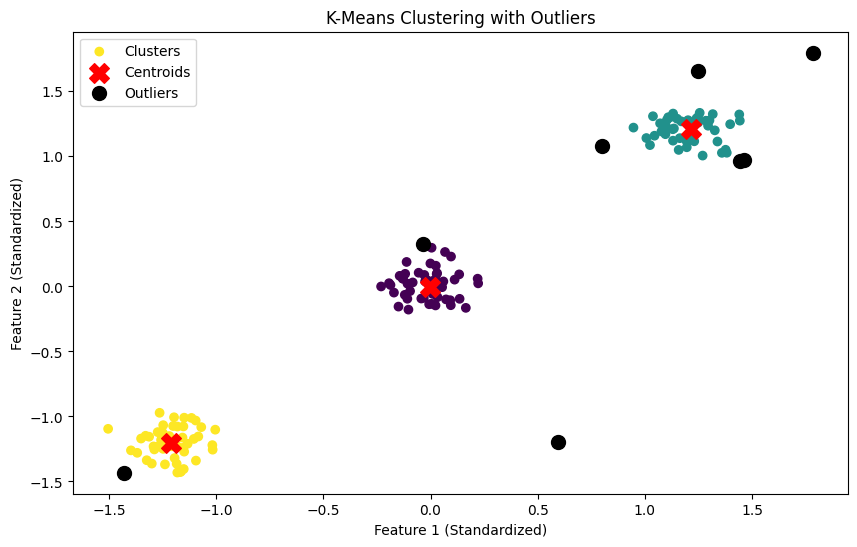

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data
np.random.seed(42)
cluster_1 = np.random.normal(loc=5, scale=1.0, size=(50, 2))
cluster_2 = np.random.normal(loc=15, scale=1.0, size=(50, 2))
cluster_3 = np.random.normal(loc=25, scale=1.0, size=(50, 2))
outliers = np.array([[3, 3], [30, 30], [20, 5]])  # Adding outliers
data = np.vstack([cluster_1, cluster_2, cluster_3, outliers])

# Step 2: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 4: Identify outliers
distances = np.min(kmeans.transform(data_scaled), axis=1)
threshold = np.percentile(distances, 95)  # Outliers are in the top 5% of distances
outlier_indices = np.where(distances > threshold)[0]

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.scatter(data_scaled[outlier_indices, 0], data_scaled[outlier_indices, 1], c='black', s=100, label='Outliers')
plt.title("K-Means Clustering with Outliers")
plt.legend()
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()


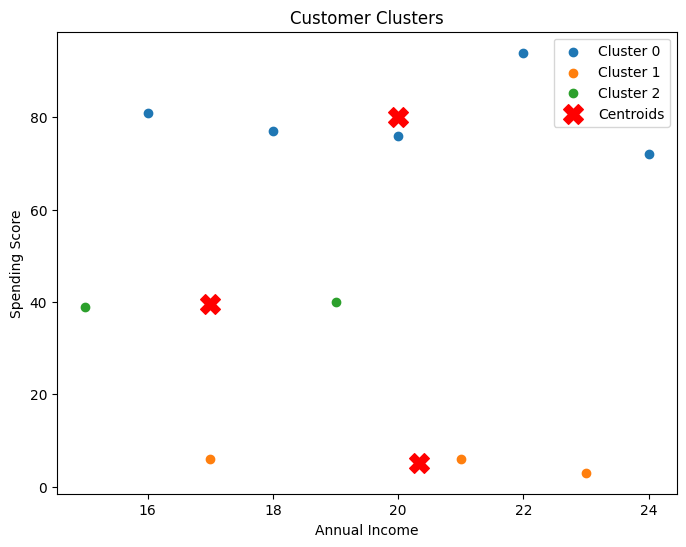

   CustomerID  Annual_Income  Spending_Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create the dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual_Income': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}
df = pd.DataFrame(data)

# Step 2: Extract features for clustering
X = df[['Annual_Income', 'Spending_Score']]

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Step 4: Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'], label=f'Cluster {cluster}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Step 6: Display the clustered data
print(df)
